# 1. Install Dependencies and Setup

In [100]:
!pip install tensorflow  

In [101]:
!pip install opencv-python matplotlib

In [106]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
astunparse               

In [107]:
import tensorflow as tf
import os



In [108]:
tf.config.list_physical_devices('CPU')
# tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [109]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [110]:
data_dir = 'data' 

In [111]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)


In [112]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [113]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\.ipynb_checkpoints


# 3. Load Data

In [114]:
import numpy as np
from matplotlib import pyplot as plt

In [115]:
data = tf.keras.utils.image_dataset_from_directory('data')
# this made image size=(256,256)
# data pipeline
# shuffle the data
# It controls the number of images loaded into memory at once, which can help prevent memory overload.(batch size=32)
# assign 0 and 1 based on happy or sad

Found 304 files belonging to 2 classes.


In [116]:
data_iterator = data.as_numpy_iterator()
# accessing data pipeline

In [117]:
batch = data_iterator.next()
# class 1=sad people
# class 0=happy people

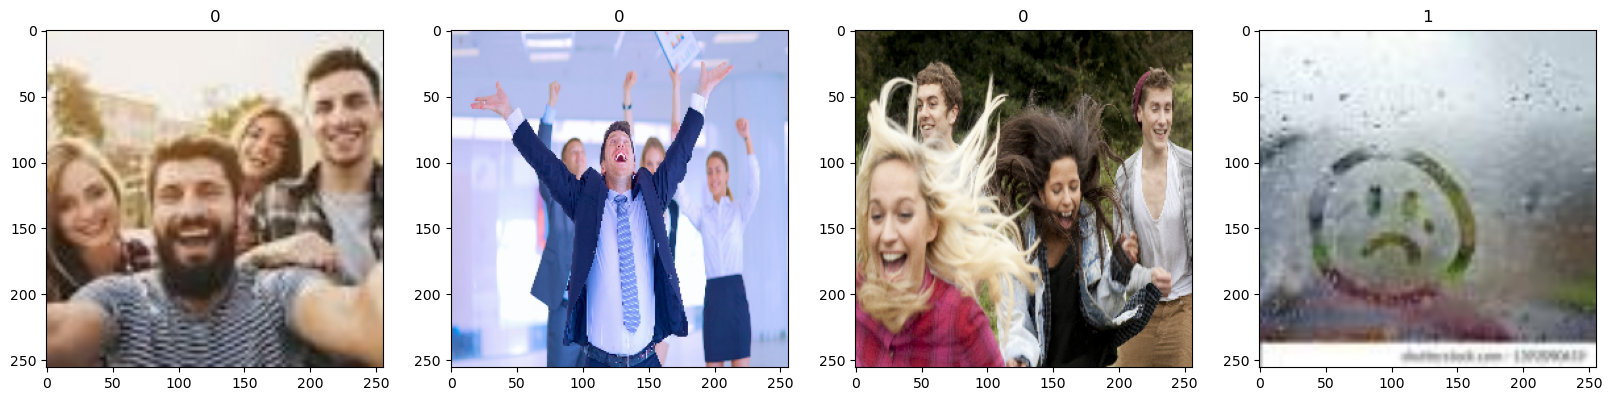

In [118]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    # The images in a TensorFlow dataset might be stored in different data types, such as floating-point values (e.g., float32),
    # where the pixel values are typically normalized between 0 and 1.

# 4. Scale Data

In [119]:
data = data.map(lambda x,y: (x/255, y))

In [120]:
data.as_numpy_iterator().next()

(array([[[[0.38106617, 0.39675245, 0.4398897 ],
          [0.39025736, 0.40594363, 0.44908088],
          [0.39944854, 0.41513482, 0.45827207],
          ...,
          [0.33838847, 0.34509805, 0.38207722],
          [0.3304228 , 0.33927697, 0.3833027 ],
          [0.34016544, 0.34800857, 0.3950674 ]],
 
         [[0.38370097, 0.39938724, 0.44252452],
          [0.39289215, 0.40857843, 0.45171568],
          [0.40095118, 0.41663748, 0.45977473],
          ...,
          [0.33838847, 0.34509805, 0.38207722],
          [0.3323783 , 0.343188  , 0.38134718],
          [0.34039187, 0.34846145, 0.394841  ]],
 
         [[0.3867647 , 0.40245098, 0.4473652 ],
          [0.3959559 , 0.41164216, 0.45655638],
          [0.40346202, 0.4191483 , 0.4640625 ],
          ...,
          [0.34016544, 0.346875  , 0.38385418],
          [0.33379146, 0.34555617, 0.3808503 ],
          [0.3421267 , 0.35030684, 0.39635465]],
 
         ...,
 
         [[0.04865148, 0.08483551, 0.11994533],
          [0.04770

# 5. Split Data

In [121]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [122]:
val_size


2

In [123]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [125]:
model = Sequential()

In [126]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [127]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [128]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [129]:
logdir='logs'

In [130]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [131]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5510 - loss: 0.7812 - val_accuracy: 0.6562 - val_loss: 0.5965
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6102 - loss: 0.6148 - val_accuracy: 0.7812 - val_loss: 0.5740
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7503 - loss: 0.5814 - val_accuracy: 0.8438 - val_loss: 0.5040
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8709 - loss: 0.4522 - val_accuracy: 0.8750 - val_loss: 0.3394
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8602 - loss: 0.3612 - val_accuracy: 0.8906 - val_loss: 0.2494
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8625 - loss: 0.3377 - val_accuracy: 0.9688 - val_loss: 0.3136
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9704 - loss: 0.2877 - val_accuracy: 0.9844 - val_loss: 0.1764
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9499 - loss: 0.1842 - val_accuracy: 0.9375 - val_loss: 0.1109
Epoch 9/20
7

# 8. Plot Performance

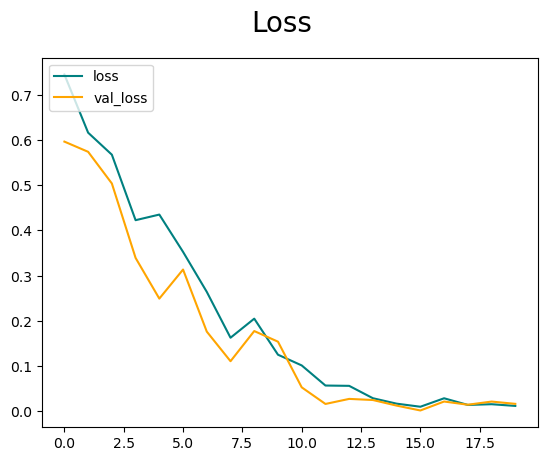

In [133]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

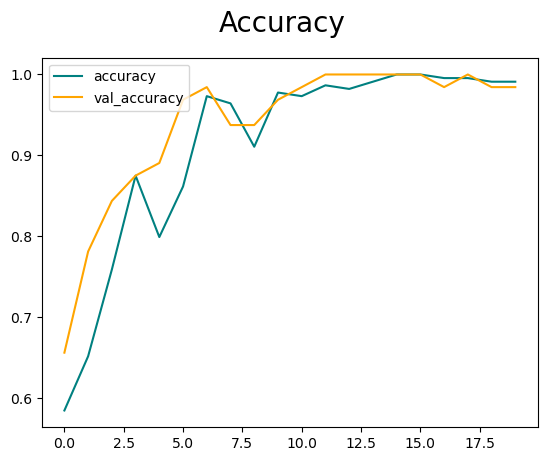

In [134]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [135]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [136]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [139]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    y_predict = model.predict(X)
    pre.update_state(y, y_predict)
    re.update_state(y, y_predict)
    acc.update_state(y, y_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [140]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [60]:
import cv2

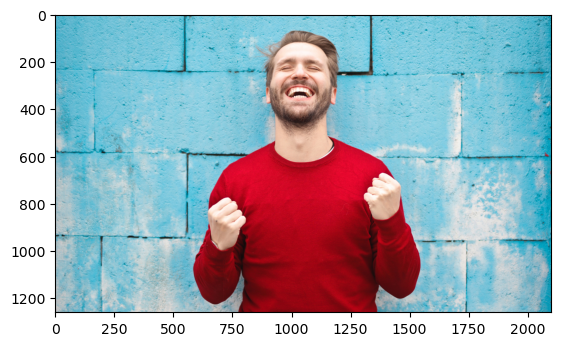

In [142]:
img = cv2.imread('how-to-be-happy.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

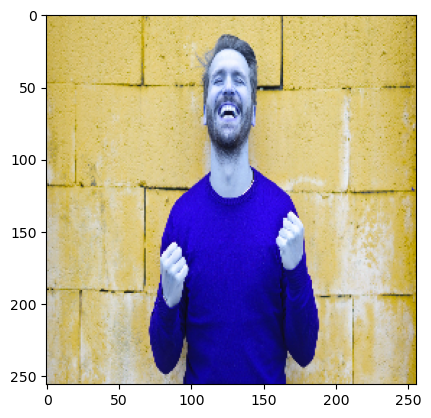

In [148]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [149]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


In [150]:
yhat

array([[8.9825095e-05]], dtype=float32)

In [151]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [155]:
from tensorflow.keras.models import load_model

In [156]:
model.save(os.path.join('models','imageclassifier.h5'))

In [157]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [158]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[8.9825095e-05]], dtype=float32)